# Physique et informatique - Entrainement

Ces exercices proposent de s'entrainer à l'utilisation de Python en physique dans le cadre de l'optique. On n'utilisera pas ici de méthode numérique particulière, simplement le tracé graphique et l'utilisation de `numpy`.

## Etude théorique
Cette partie est semblable à un exercice d'entrainement classique.

On considère un axe Ox et on supposera par la suite que _tous les axes optiques des systèmes centrées mis en jeu sont confondus avec Ox._ On repèrera donc la position longitudinale de tout objet, image ou lentille par une coordonnées $x$ sur cet axe. __Attention, ces coordonnées ne sont PAS des distance algébriques comme dans les relations de conjugaison.__

On choisi un axe $Oy$ orienté de sorte à ce que $(O, \overrightarrow{e}_x, \overrightarrow{e}_y)$ soit orienté dans le sens trigonométrique. La côté $y$ d'un objet ou d'une image sur cet axe correspondra à sa taille.

````{admonition} Mise en équation
:class: tip
1. On considère une lentille placé à la coordonnée $x_L$, de distance focale $f'$ et un objet lumineux situé à une coordonnée $x_O$ et de taille $y_O$. Exprimer la position $x_I$ et la taille $y_I$ de l'image de cet objet par la lentille et montrer que :

$$
\begin{cases}
x_I &= x_L + \frac{f' (x_O - x_L)}{f' + x_O - x_L}\\
y_I &= \frac{f'}{f' + x_0 - x_L}y_O
\end{cases}
$$
````

On va considérer pour l'étude numérique un système à trois lentilles $(L_2), (L_3), L_4)$ telle que:

$$
\begin{cases}
f_2 = f_4 &= -6 \rm{cm}\\
f_3 &= 3.5 \rm{cm}\\
\overline{O_2 O_4} &= f_4 + \frac{f_2 f_3}{f_2 + f_3}
\end{cases}
$$

Les lentilles $L_2$ et $L_4$ sont fixes et la lentilles $L_3$ peut se déplacer entre les deux lentilles.

On rappelle que lorsque deux lentilles de distances focales $f_A$ et $f_B$ sont accolées, l'ensemble est équivalent à une seule lentille dont la distance focale est:

$$
f_{eq} = \frac{f_A f_B}{f_B + f_B}
$$

````{admonition} Cas extrêmes.
:class: tip
Justifier que lorsque $L_3$ est accolée à $L_2$ ou à $L_4$, alors le système est afocal.
````

## Partie code
Vous allez maintenant vous entraîner à coder en Python. Lorsqu'on code des problèmes physiques, il est important de savoir sous quelle forme/type on va coder les objets physiques. Ici:
* Les objets et les images seront représentés par des listes de deux flottants `obj <- [xi, yi]` où `xi` et `yi` représentent les coordonnées de l'objet (position sur Ox et taille sur Oy).
* Les lentilles seront représentées par des listes de deux flottants `L1 <- [xL, f]` où `xL` représente la position sur Ox de la lentille et `f` la distance focale image de la lentille.

In [1]:
# Exemples
objet1 = [-3, 1] # Objet ou image en x=-3 de taille y=1
lentille1 = [2, -1] # Lentilles en x=2 de distance focale f=-1
print(objet1[0])  # Quelle valeur est affichee ? A quelle grandeur physique correspond-elle ?

-3


Lorsqu'on étudiera le système $L_2 + L_3 + L_4$, on supposera que la lentille $L_2$ est placée en $O$, soit $x_2 = 0$.

````{admonition} Codons
:class: tip
1. Ecrire une fonction `image(L:list, objet:list) --> list` qui prend comme argument:
    * `L`: une liste représentant une lentille
    * `objet`: une liste représentant un objet  
    et qui renvoie une liste représentant l'image de l'objet par la lentille.
2. Se servir de la fonction image pour trouver la position de l'image finale donnée par le système $L_2 + L_3 + L_4$ lorsque $L_3$ est au milieu de $L_2$ et $L_4$ pour un objet situé 1m avant le système.
3. Ecrire une procédure `systeme(objet:list) --> list` qui prend comme argument un objet et qui renvoie la position finale après le système $L_2 + L_3 + L_4$.
4. Pour 100 positions équiréparties d'objet entre 100m et 1m, tous de taille 1, obtenir, sous forme de liste les positions des images correspondant. On devra pour cela:
    * Utiliser la fonction `numpy.linspace` pour créer un vecteur position d'objet équiréparties.
    * Utiliser une boucle pour obtenir et stocker les positions d'image obtenues dans une liste.
5. Modifier le programme précédent pour obtenir aussi dans une seconde liste, les tailles des images.
6. Tracer 2 graphiques représentant la position ou la taille de l'image en fonction de la position de l'objet.
````

656.0296296296336


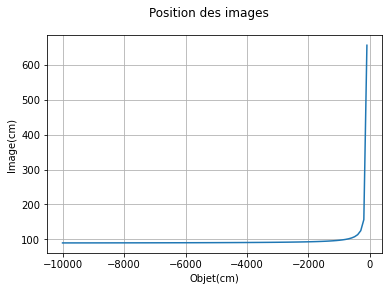

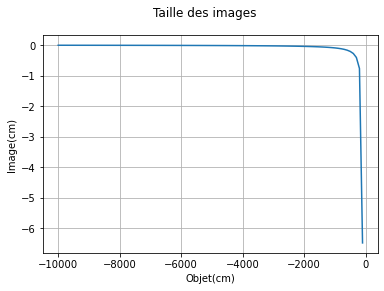

In [2]:
#1
def image(L: list, objet:list) -> list:
    xL = L[0]
    f = L[1]
    xO = objet[0]
    yO = objet[1]
    return [xL + (f * (xO -xL) ) / (f + xO - xL), yO * f / (f + xO - xL)]

#2
f2 = -6
f4 = -6
f3 = 3.5
x4 = f4 + f2 * f3 / (f2 + f3)
image1 = image([0, f2], [-100, 1])
image2 = image([x4 / 2, f3], image1)
imagef = image([x4, f4], image2)
print(imagef[0])

#3
def systeme(objet:list) -> list:
    f2 = -6
    f4 = -6
    f3 = 3.5
    x4 = f4 + f2 * f3 / (f2 + f3)
    image1 = image([0, f2], objet)
    image2 = image([x4 / 2, f3], image1)
    imagef = image([x4, f4], image2)
    return imagef

#4 et #5
import numpy as np
pos_objet = np.linspace(-10000, -100, 100)
images_pos = []
images_taille = []
for pos in pos_objet:
    imagef = systeme([pos, 1])
    images_pos.append(imagef[0])
    images_taille.append(imagef[1])

#6
import matplotlib.pyplot as plt
f, ax = plt.subplots()
f.suptitle("Position des images")
ax.set_xlabel('Objet(cm)')
ax.set_ylabel('Image(cm)')
ax.plot(pos_objet, images_pos)
ax.grid()

f, ax = plt.subplots()
f.suptitle("Taille des images")
ax.set_xlabel('Objet(cm)')
ax.set_ylabel('Image(cm)')
ax.plot(pos_objet, images_taille)
ax.grid()